In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

import argparse
import datetime
import math
import h5py
import numpy as np
import tensorflow as tf
import socket
import importlib
import os
import sys
#BASE_DIR = os.path.dirname(os.path.abspath(__file__))
BASE_DIR = "/data/yuhsiao/pointnet"
sys.path.append(BASE_DIR)
sys.path.append(os.path.join(BASE_DIR, 'models'))
sys.path.append(os.path.join(BASE_DIR, 'utils'))
import provider
import tf_util


/home/yuhsiao/.conda/envs/pn3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def plot_point_cloud2(data, elev_incre=45, azim_incre=45):
    xs = data[:,0]
    ys = data[:,1]
    zs = data[:,2]

    n_elev = int(np.ceil(181/elev_incre))
    n_azim = int(np.ceil(181/azim_incre))

    fig = plt.figure(figsize=(2*n_azim, 2*n_elev))

    for i, elev in enumerate(range(-180, 1, elev_incre)):
        for j, azim in enumerate(range(0, 181, azim_incre)):
            ax = fig.add_subplot(n_elev, n_azim, i*n_azim+j+1, projection='3d')
            ax.scatter(xs, ys, zs, s=0.1)
            # ax.scatter(xs, ys, zs, c=c, marker=m)

            ax.set_xlabel('x', fontsize=8)
            ax.set_ylabel('y', fontsize=8)
            ax.set_zlabel('z', fontsize=8)

            #ax.set_title("e={},a={}".format(elev, azim))
            ax.set_aspect('equal', 'box')

            X = xs
            Y = ys
            Z = zs
            max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0

            mid_x = (X.max()+X.min()) * 0.5
            mid_y = (Y.max()+Y.min()) * 0.5
            mid_z = (Z.max()+Z.min()) * 0.5
            ax.set_xlim(mid_x - max_range, mid_x + max_range)
            ax.set_ylim(mid_y - max_range, mid_y + max_range)
            ax.set_zlim(mid_z - max_range, mid_z + max_range)

            ax.tick_params(axis='both', which='major', labelsize=6)
            ax.tick_params(axis='both', which='minor', labelsize=4)
            ax.view_init(elev, azim)

    plt.show()

In [3]:
TRAIN_FILES = provider.getDataFiles( \
    os.path.join(BASE_DIR, 'data/modelnet40_ply_hdf5_2048/train_files.txt'))
TEST_FILES = provider.getDataFiles(\
    os.path.join(BASE_DIR, 'data/modelnet40_ply_hdf5_2048/test_files.txt'))


In [4]:
TRAIN_FILES


['data/modelnet40_ply_hdf5_2048/ply_data_train0.h5',
 'data/modelnet40_ply_hdf5_2048/ply_data_train1.h5',
 'data/modelnet40_ply_hdf5_2048/ply_data_train2.h5',
 'data/modelnet40_ply_hdf5_2048/ply_data_train3.h5',
 'data/modelnet40_ply_hdf5_2048/ply_data_train4.h5']

In [5]:
train_file_idxs = np.arange(0, len(TRAIN_FILES))
np.random.shuffle(train_file_idxs)

print(train_file_idxs)


[3 2 4 0 1]


In [6]:
# for fn in range(len(TRAIN_FILES)):

NUM_POINT = 1024
BATCH_SIZE = 32

fn = 0

# log_string('----' + str(fn) + '-----')
current_data, current_label = provider.loadDataFile(TRAIN_FILES[train_file_idxs[fn]])
current_data = current_data[:,0:NUM_POINT,:]
current_data, current_label, _ = provider.shuffle_data(current_data, np.squeeze(current_label))            
# current_label = np.squeeze(current_label)

file_size = current_data.shape[0]
num_batches = file_size // BATCH_SIZE

# total_correct = 0
# total_seen = 0
# loss_sum = 0

In [7]:
current_data.shape

(2048, 1024, 3)

In [8]:
current_label.shape

(2048,)

In [9]:
file_size

2048

In [10]:
num_batches

64

In [11]:
dd = current_data[0]

In [12]:
rr = np.sqrt((dd**2).sum(axis=1))

In [13]:
rr.std()

0.21648794

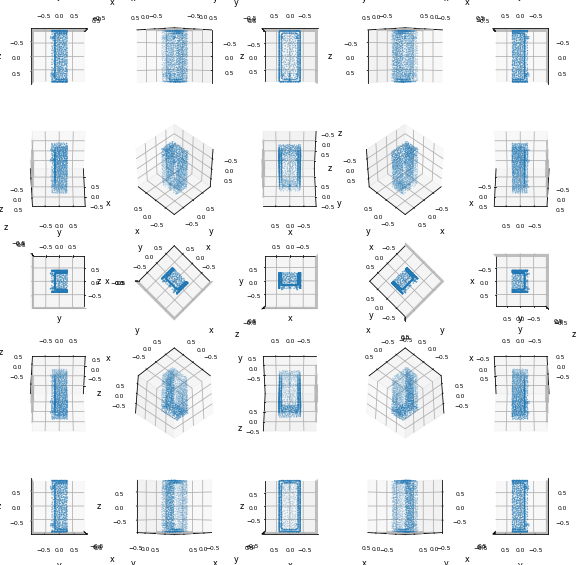

In [14]:
plot_point_cloud2(dd)

In [15]:
dd[:,1].std()

0.1625992

In [16]:
dd2 = provider.rotate_point_cloud(current_data[0:1])

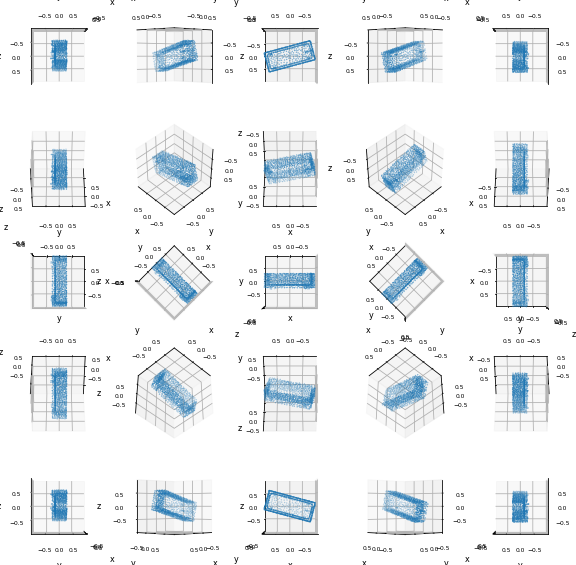

In [17]:
plot_point_cloud2(dd2[0])

In [18]:
dd2.shape

(1, 1024, 3)

In [19]:
dd.shape

(1024, 3)

In [20]:
dd3 = provider.rotate_point_cloud_by_angle(dd, 1.57)

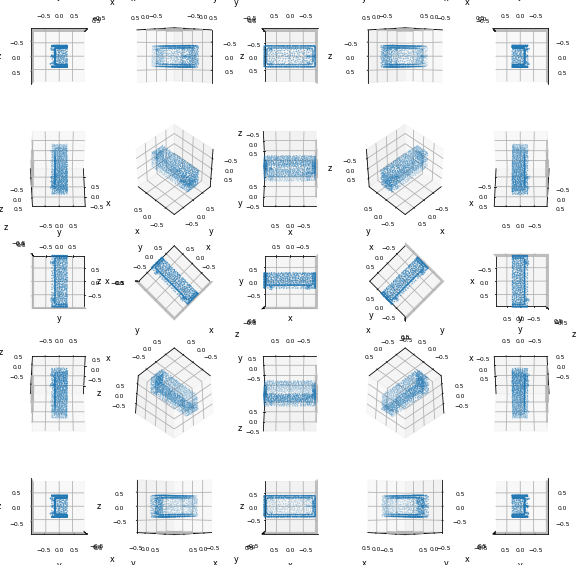

In [21]:
plot_point_cloud2(dd3)

In [22]:
jittered_data = provider.jitter_point_cloud(dd2)

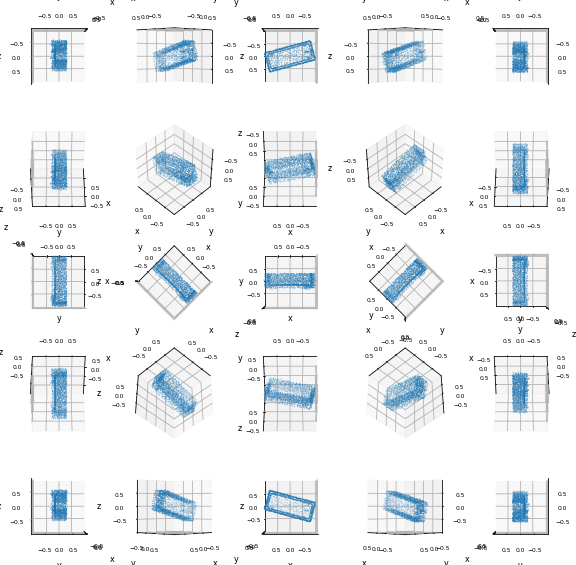

In [23]:
plot_point_cloud2(jittered_data[0])

In [24]:
MODEL = importlib.import_module("pointnet_cls")

In [25]:
MODEL

<module 'pointnet_cls' from '/data/yuhsiao/pointnet/models/pointnet_cls.py'>

## Training command

```
python train.py --gpu 0 --name my_model_1024 --num_point 1024 --max_epoch 100
python train.py --gpu 0 --name my_model_2048 --num_point 2048 --max_epoch 100
python train.py --gpu 1 --name my_model_512 --num_point 512 --max_epoch 100
python train.py --gpu 1 --name my_model_256 --num_point 256 --max_epoch 100
python train.py --gpu 2 --name my_model_128 --num_point 128 --max_epoch 100
python train.py --gpu 2 --name my_model_64 --num_point 64 --max_epoch 100


```

## Testing command

python predict.py --gpu 0 --name my_model_1024-90 --num_point 1024 


## Data clustering

In [157]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import mixture

In [29]:
pnt_data, pnt_label = provider.loadDataFile(TRAIN_FILES[2])


In [421]:

def plot_point_cloud_overlay(*args, elev=-90, azim=90):
    xs = args[0][0][:,0]
    ys = args[0][0][:,1]
    zs = args[0][0][:,2]
    
    cmap = plt.get_cmap("tab10")
    
    size = 1
    color = 'b'

    #fig = plt.figure(figsize=(12, 12))
    fig = plt.figure(figsize=(8, 8))

    for i, (elev, azim) in enumerate([(-180, 90), (-180, 180), (-90, 90), (-135, 135)]):
        ax = fig.add_subplot(2,2,i+1, projection='3d')
        for arg in args:
            data, size, color_idx = arg

            ax.scatter(data[:,0], data[:,1], data[:,2], s=size, c=cmap(color_idx))

        ax.set_xlabel('x', fontsize=8)
        ax.set_ylabel('y', fontsize=8)
        ax.set_zlabel('z', fontsize=8)

        #ax.set_title("e={},a={}".format(elev, azim))
        ax.set_aspect('equal', 'box')

        max_range = np.array([xs.max()-xs.min(), ys.max()-ys.min(), zs.max()-zs.min()]).max() / 2.0

        mid_x = (xs.max()+xs.min()) * 0.5
        mid_y = (ys.max()+ys.min()) * 0.5
        mid_z = (zs.max()+zs.min()) * 0.5
        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)

        ax.tick_params(axis='both', which='major', labelsize=6)
        ax.tick_params(axis='both', which='minor', labelsize=4)
        ax.view_init(elev, azim)
    plt.tight_layout()
    plt.show()
    return fig

In [422]:
#db = DBSCAN(eps=0.3, min_samples=10).fit(X)

def get_super_points(X, n, method="gmm"):
    
    if method == "km":
        km = KMeans(n_clusters=n).fit(X)
        spnts = []
        weights = []
        for l in range(N):
            cluster = X[km.labels_==l]
            spnts.append(cluster.mean(axis=0))
            weights.append(cluster.shape[0])
    
        sp = np.array(spnts)
        sw = np.array(weights)/X.shape[0]
    
    elif method == "gmm":
        gmm = mixture.GaussianMixture(n_components=n, covariance_type='spherical').fit(X)
        sp = gmm.means_
        sw = gmm.weights_
        
    return sp, sw

In [416]:
idx = 10  # lamp
# idx = 11  # lamp
idx = 15  # swirvel chair
# idx = 19  # shelf
idx = 20
X = pnt_data[idx]

sp, sw = get_super_points(X, 256, method='km')
# sp, sw = get_super_points_gmm(X, 256)

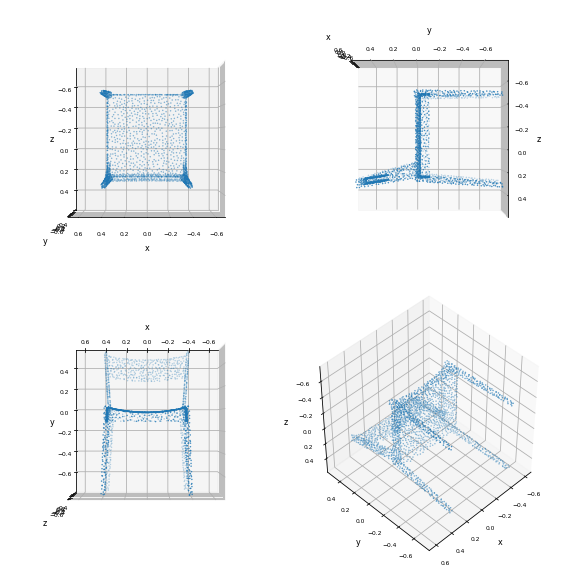

In [424]:
fig = plot_point_cloud_overlay( (X, 0.2, 0), elev=-90, azim=90)

In [425]:
fig.savefig("chair.pdf", bbox_inches='tight')

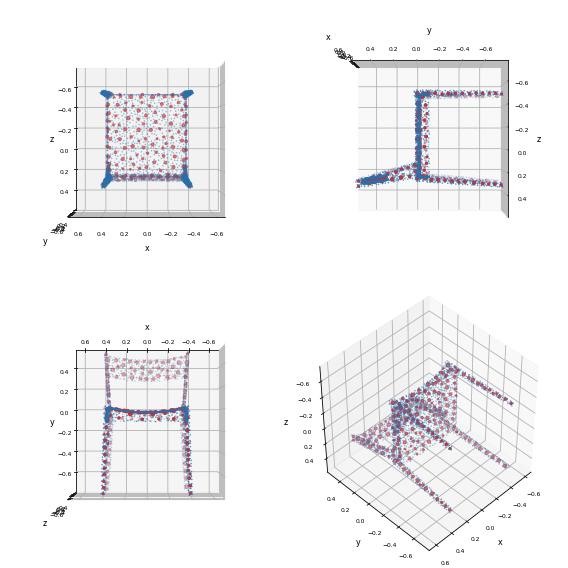

In [426]:
fig = plot_point_cloud_overlay( (X, 0.2, 0), (sp, sw*X.shape[0], 3), elev=-90, azim=90)

In [427]:
fig.savefig("chair_augmented.pdf", bbox_inches='tight')

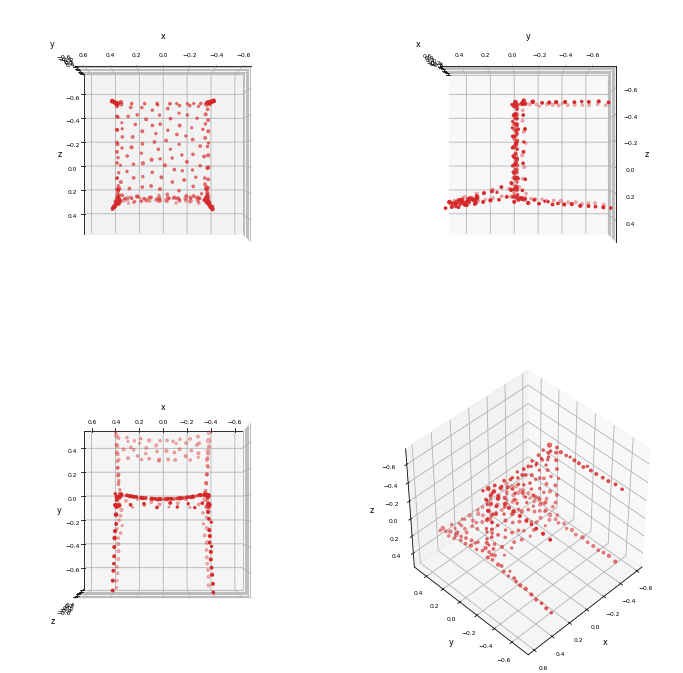

In [216]:
sp, sw = get_super_points(X, 256, method='km')

plot_point_cloud_overlay( (sp, sw*X.shape[0], 3), elev=-90, azim=90)

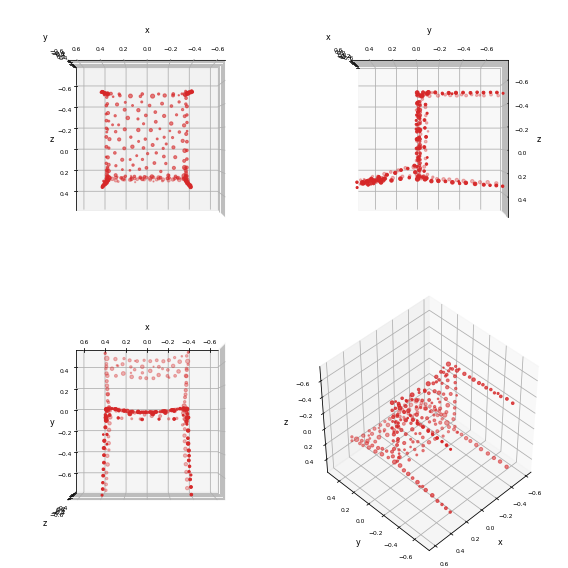

In [420]:
sp, sw = get_super_points(X, 256, method='gmm')

plot_point_cloud_overlay( (sp, sw*X.shape[0], 3), elev=-90, azim=90)

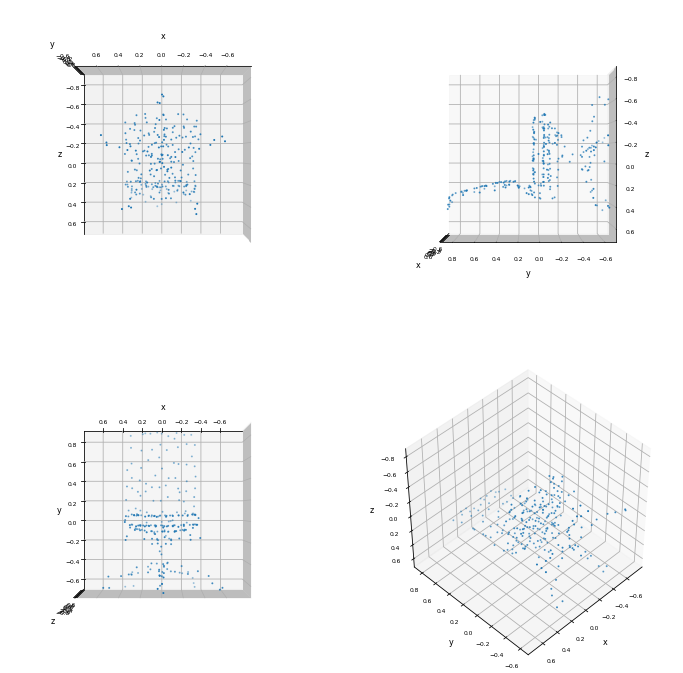

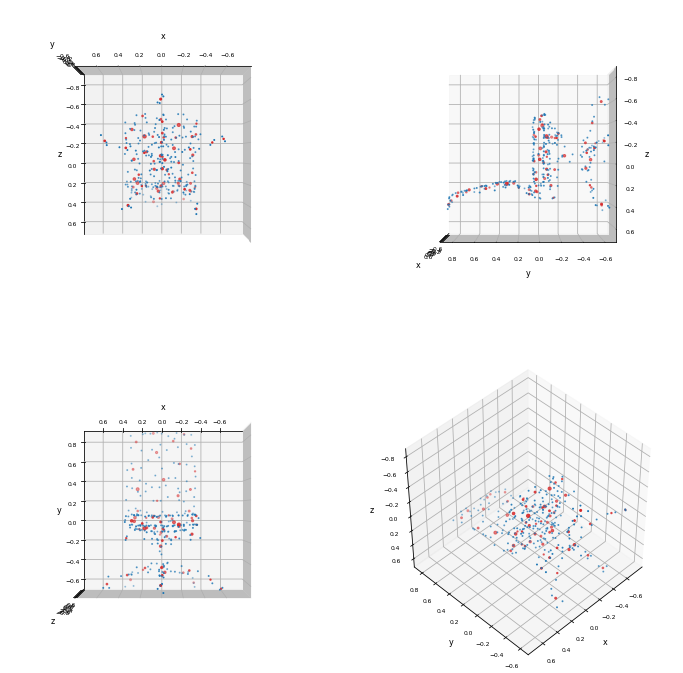

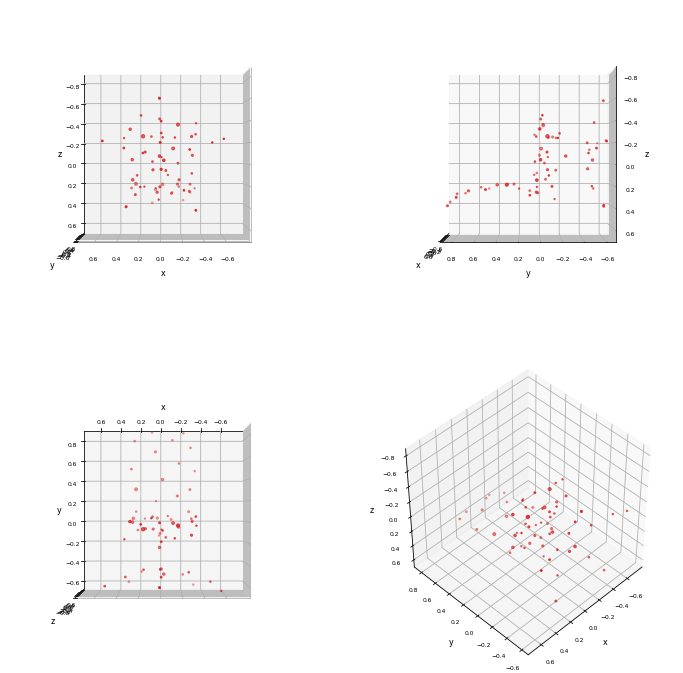

In [232]:
N = 256
sp, sw = get_super_points(X[:N, :], N//4, method='gmm')
plot_point_cloud_overlay( (X[:N, :], 1, 0), elev=-90, azim=90)
plot_point_cloud_overlay( (X[:N, :], 1, 0), (sp, sw*X[:N,:].shape[0], 3), elev=-90, azim=90)
plot_point_cloud_overlay( (sp, sw*X[:N,:].shape[0], 3), elev=-90, azim=90)

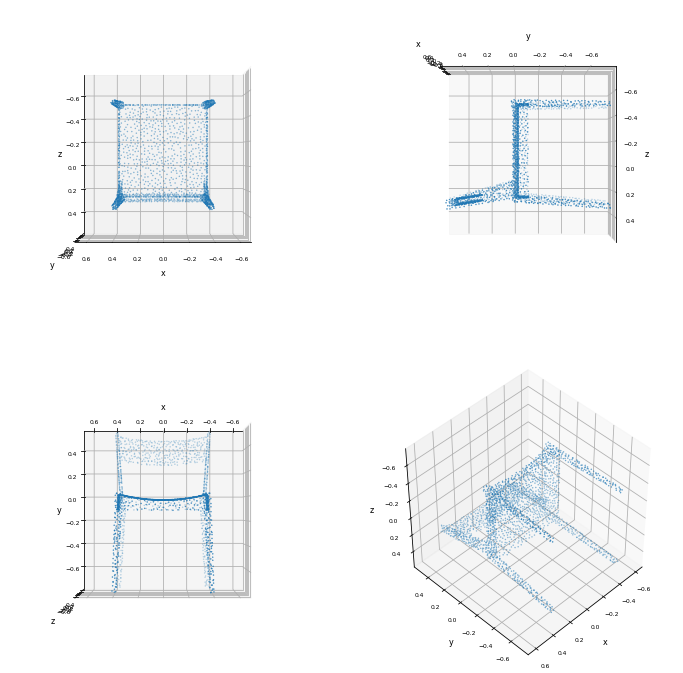

In [222]:
plot_point_cloud_overlay( (X, 0.2, 0), elev=-90, azim=90)

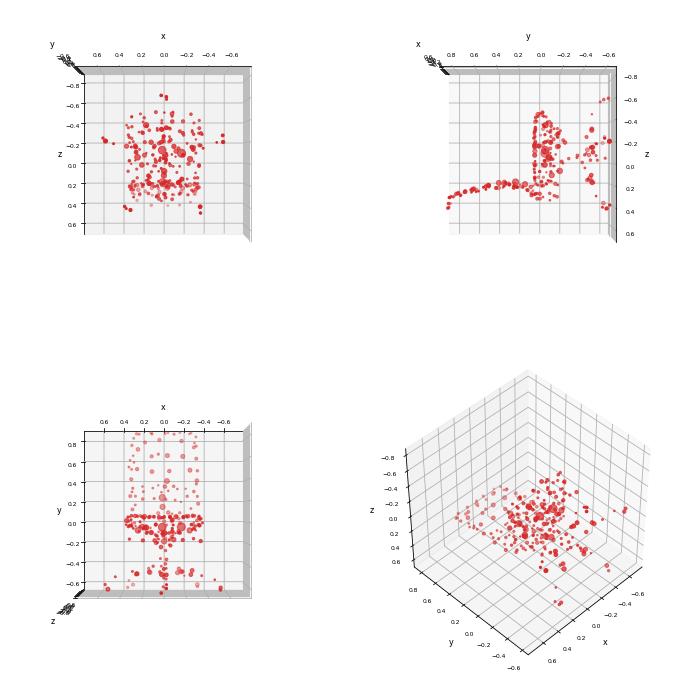

In [175]:
plot_point_cloud_overlay( (sp, sw, 3), elev=-90, azim=90)  # full

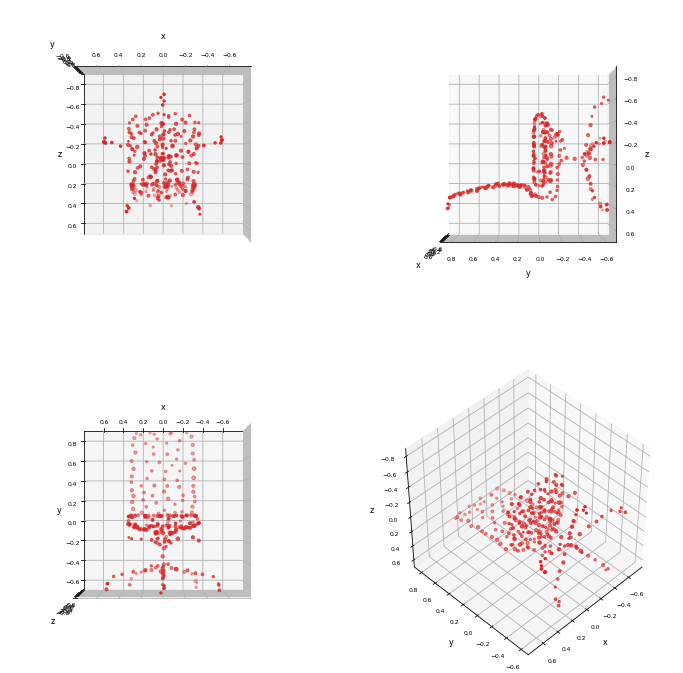

In [178]:
plot_point_cloud_overlay( (sp, sw, 3), elev=-90, azim=90)  # tied

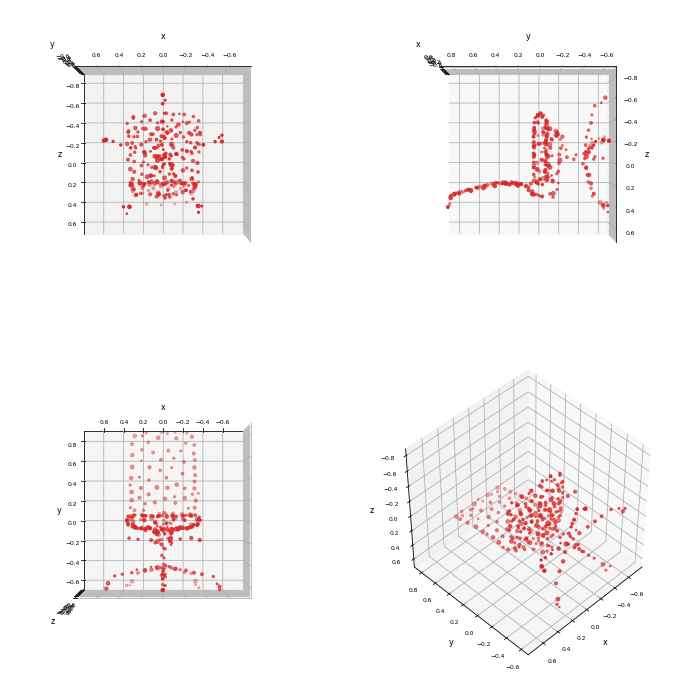

In [184]:
plot_point_cloud_overlay( (sp, sw, 3), elev=-90, azim=90)  # spherical

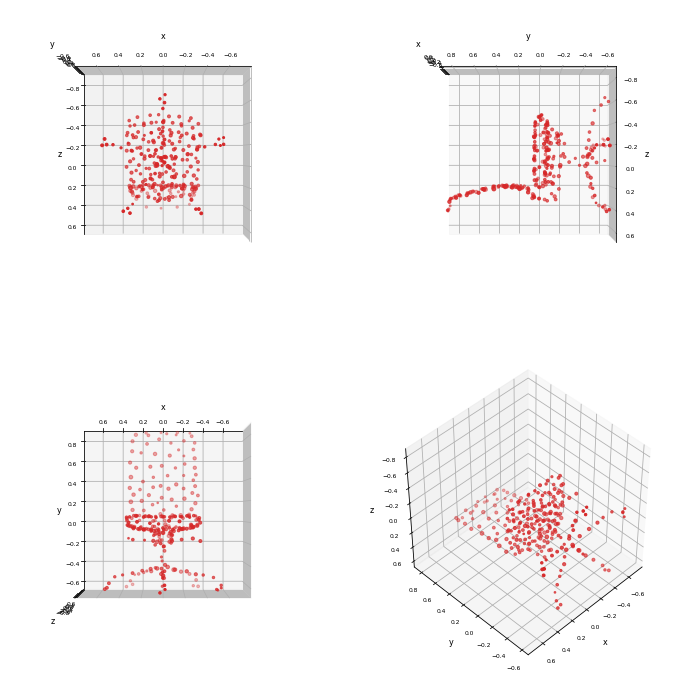

In [186]:
plot_point_cloud_overlay( (sp, sw, 3), elev=-90, azim=90)  # kmeans

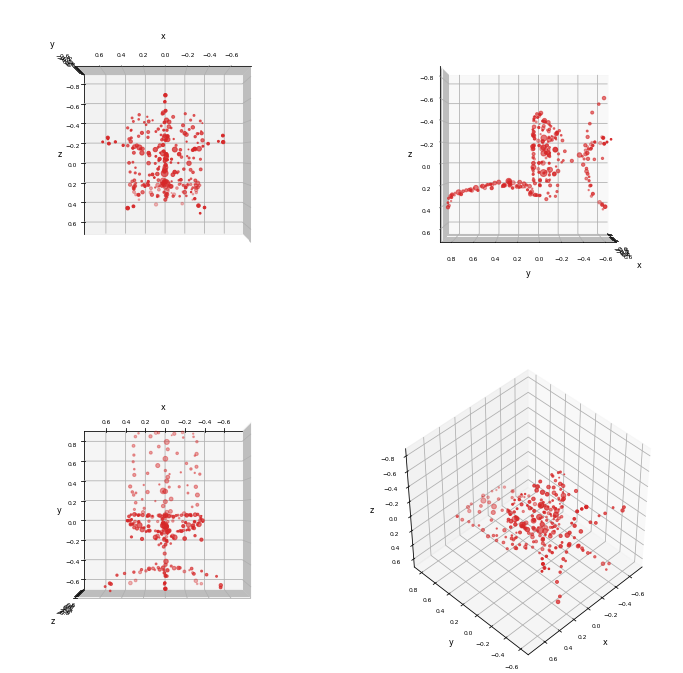

In [181]:
plot_point_cloud_overlay( (sp, sw, 3), elev=-90, azim=90)  # diag

spherical > tied > kmeans

## Test aug func

In [300]:
import datetime

def augment_one_sample_with_super_points(data, num_clusters, method='gmm', normalize_weight='inverse_std'):
    aug_data = np.zeros((data.shape[0], 7))
    aug_data[:,:3] = data
    
    if method == "km":
        km = KMeans(n_clusters=num_clusters).fit(X)
        spnts = []
        weights = []
        for l in range(num_clusters):
            cluster = X[km.labels_==l]
            spnts.append(cluster.mean(axis=0))
            weights.append(cluster.shape[0])
    
        labels = km.labels_
        sp = np.array(spnts)
        sw = np.array(weights)/X.shape[0]
    
    elif method == "gmm":
        gmm = mixture.GaussianMixture(n_components=num_clusters, covariance_type='spherical').fit(X)
        labels = gmm.predict(X)
        sp = gmm.means_
        sw = gmm.weights_
            
    # Normalize weights
    if normalize_weight == 'inverse':
        sw = 1/sw
    elif normalize_weight == 'inverse_std':
        sw = 1/sw
        sw /= sw.std()
    elif normalize_weight == 'inverse_mean_std':
        sw = 1/sw
        sw -= sw.mean()
        sw /= sw.std()
    elif normalize_weight == 'std':
        sw /= sw.std()
    elif normalize_weight == 'mean_std':
        sw -= sw.mean()
        sw /= sw.std()
    elif normalize_weight is not False:
        raise ValueError("Unexpected normalize_weight option")
        
    # Augment with cluster centers, weights
    for i in range(aug_data.shape[0]):
        aug_data[i, 3:6] = sp[labels[i]]
        aug_data[i, 6] = sw[labels[i]]
    
    return sp, sw, aug_data

def augment_with_super_points(batch_data, num_clusters, method='gmm', normalize_weight='inverse_std'):
    aug_batch_data = np.zeros((batch_data.shape[0], batch_data.shape[1], 7))
    for i in range(aug_batch_data.shape[0]):
        _, _, aug_batch_data[i,:,:] = augment_one_sample_with_super_points(
            batch_data[i,:,:], num_clusters, method, normalize_weight
        )
        if (i+1) % 32 == 0:
            print("{}: {}".format(datetime.datetime.now(), i+1))
    return aug_batch_data


In [297]:
N = 512
sp, sw, aug_data = augment_one_sample_with_super_points(X[:N, :], N//4, method='gmm', normalize_weight='inverse')


In [302]:
N = 256
aug_pnt_data = augment_with_super_points(pnt_data[:256,:N,:], N//4, method='gmm', normalize_weight='inverse_std')

2018-03-18 11:58:03.011265: 32
2018-03-18 11:58:09.847957: 64
2018-03-18 11:58:17.076899: 96
2018-03-18 11:58:24.884175: 128
2018-03-18 11:58:31.964874: 160
2018-03-18 11:58:39.015757: 192
2018-03-18 11:58:46.405039: 224
2018-03-18 11:58:54.031298: 256


## Augment data

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train0.h5 data/augmented/train_data_256_64_gmm_inverse_std_0.h5 \
--method gmm --normalize-weight inverse_std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train1.h5 data/augmented/train_data_256_64_gmm_inverse_std_1.h5 \
--method gmm --normalize-weight inverse_std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train2.h5 data/augmented/train_data_256_64_gmm_inverse_std_2.h5 \
--method gmm --normalize-weight inverse_std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train3.h5 data/augmented/train_data_256_64_gmm_inverse_std_3.h5 \
--method gmm --normalize-weight inverse_std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train4.h5 data/augmented/train_data_256_64_gmm_inverse_std_4.h5 \
--method gmm --normalize-weight inverse_std --input-num-points 256 --num-clusters 64


python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_test0.h5 data/augmented/test_data_256_64_gmm_inverse_std_0.h5 \
--method gmm --normalize-weight inverse_std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_test1.h5 data/augmented/test_data_256_64_gmm_inverse_std_1.h5 \
--method gmm --normalize-weight inverse_std --input-num-points 256 --num-clusters 64



python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train0.h5 data/augmented/train_data_256_64_gmm_std_0.h5 \
--method gmm --normalize-weight std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train1.h5 data/augmented/train_data_256_64_gmm_std_1.h5 \
--method gmm --normalize-weight std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train2.h5 data/augmented/train_data_256_64_gmm_std_2.h5 \
--method gmm --normalize-weight std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train3.h5 data/augmented/train_data_256_64_gmm_std_3.h5 \
--method gmm --normalize-weight std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train4.h5 data/augmented/train_data_256_64_gmm_std_4.h5 \
--method gmm --normalize-weight std --input-num-points 256 --num-clusters 64


python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_test0.h5 data/augmented/test_data_256_64_gmm_std_0.h5 \
--method gmm --normalize-weight std --input-num-points 256 --num-clusters 64

python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_test1.h5 data/augmented/test_data_256_64_gmm_std_1.h5 \
--method gmm --normalize-weight std --input-num-points 256 --num-clusters 64



for i in `seq 0 4`;
do
    python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_train$i.h5 data/augmented/train_data_256_64_$1_$2_$i.h5 \
    --method $1 --normalize-weight $2 --input-num-points 256 --num-clusters 64
    echo "data/augmented/train_data_256_64_$1_$2_$i.h5" >> data/augmented/train_files_256_64_$1_$2.txt
done

for i in `seq 0 1`;
do
    python augment_data.py data/modelnet40_ply_hdf5_2048/ply_data_test$i.h5 data/augmented/test_data_256_64_$1_$2_$i.h5 \
    --method $1 --normalize-weight $2 --input-num-points 256 --num-clusters 64
    echo "data/augmented/test_data_256_64_$1_$2_$i.h5" >> data/augmented/test_files_256_64_$1_$2.txt
done



## Read augmented data

In [355]:
filename = 'data/augmented/train_data_256_64_gmm_inverse_std_2.h5'
fin = h5py.File(filename, 'r')
aug_data = fin['data'][:][15]

In [356]:
fin['data'][:].shape

(2048, 256, 7)

In [359]:
fin['data'][:][0,:,6]

array([2.127329  , 1.6159697 , 2.1379352 , 1.9026552 , 2.1950412 ,
       2.0586503 , 1.3787953 , 1.590937  , 0.66888726, 3.192168  ,
       1.6645874 , 1.6570733 , 2.1895149 , 0.6673161 , 1.583417  ,
       1.5826738 , 1.6570733 , 1.0004735 , 2.0339758 , 1.5328459 ,
       0.8903457 , 6.3515744 , 1.5521415 , 2.0871553 , 1.8383129 ,
       1.1942899 , 1.2718477 , 1.1144316 , 1.4177132 , 0.5660396 ,
       0.8322267 , 1.0004735 , 0.66888726, 3.223686  , 0.6673161 ,
       3.2293694 , 1.6457024 , 1.5339857 , 2.4694407 , 0.98542184,
       0.96208286, 1.5826738 , 2.0895107 , 3.1959445 , 1.1942899 ,
       2.118509  , 1.185322  , 0.6673161 , 0.8903457 , 2.1398256 ,
       1.1144316 , 0.98542184, 2.0871553 , 1.5339857 , 1.6457024 ,
       0.8322267 , 0.7451022 , 0.5660396 , 1.6457024 , 2.0936012 ,
       1.6159482 , 1.3787953 , 1.583417  , 1.8383129 , 1.5521415 ,
       0.66888726, 0.66888726, 2.0586503 , 0.96208286, 1.0004735 ,
       2.4694407 , 0.8903457 , 3.1770647 , 3.1928427 , 3.24194

## Batch rotation



In [344]:
def rotate_point_cloud(batch_data):
    """ Randomly rotate the point clouds to augument the dataset
        rotation is per shape based along up direction
        Input:
          BxNx3 array, original batch of point clouds
        Return:
          BxNx3 array, rotated batch of point clouds
    """
    rotated_data = np.copy(batch_data)
    for k in range(batch_data.shape[0]):
        rotation_angle = np.random.uniform() * 2 * np.pi
        cosval = np.cos(rotation_angle)
        sinval = np.sin(rotation_angle)
        rotation_matrix = np.array([[cosval, 0, sinval],
                                    [0, 1, 0],
                                    [-sinval, 0, cosval]])
        shape_pc = batch_data[k, ...]
        num_coord_sets = shape_pc.shape[1]//3
        for i in range(num_coord_sets):
            coords = shape_pc[:, 3*i:3*(i+1)]
            rotated_data[k, :, 3*i:3*(i+1)] = coords.reshape((-1, 3)).dot(rotation_matrix)
    return rotated_data


In [349]:
batch = fin['data'][:][:32, :, :3]
rotated_batch = rotate_point_cloud(batch)

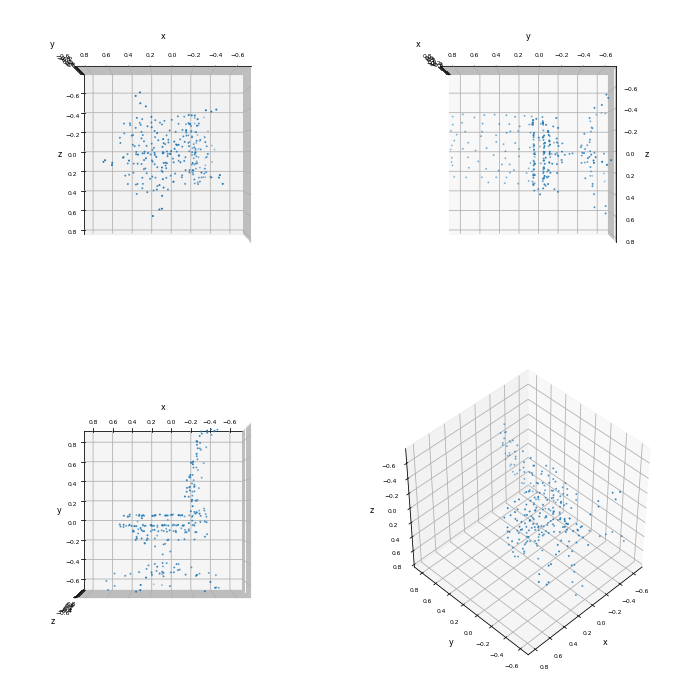

In [352]:
plot_point_cloud_overlay( (rotated_batch[15,:,:3], 1, 0), elev=-90, azim=90) 

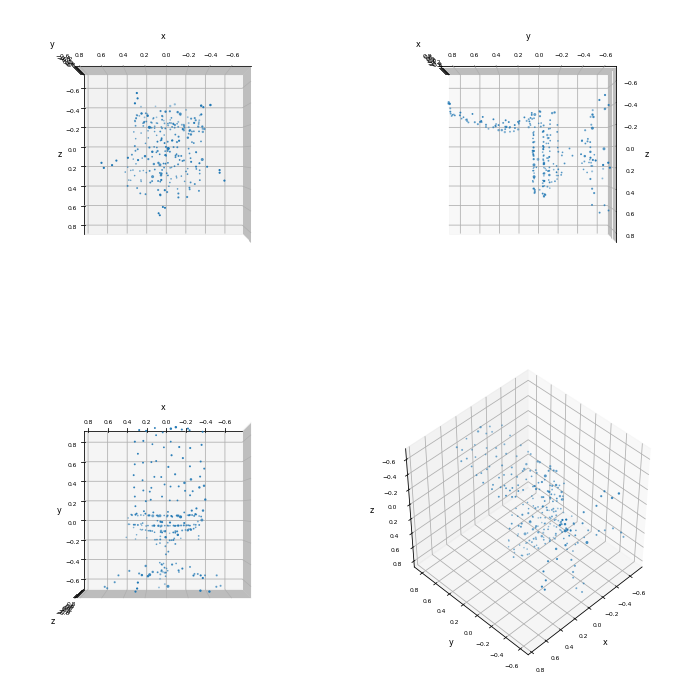

In [346]:
plot_point_cloud_overlay( (rotated_batch[15,:,:3], rotated_batch[15,:,6], 0), elev=-90, azim=90) 

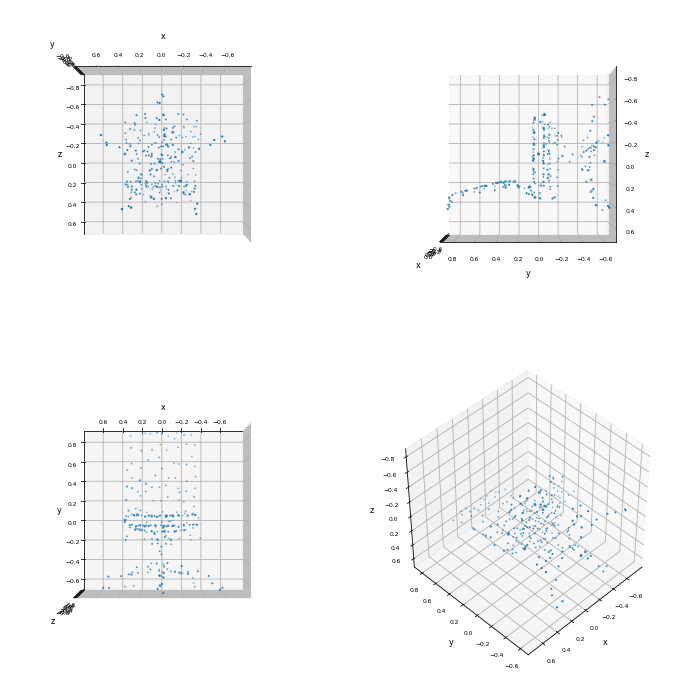

In [334]:
plot_point_cloud_overlay( (rotated_batch[:,:3], aug_data[:,6], 0), elev=-90, azim=90)


## Train spnt

python train.py --gpu 0 --name model_spnt_256_64 --num_point 256 --max_epoch 150 --model pointnet_spnt --decay_rate 0.76
python train.py --gpu 4 --name model_spnt_256_64 --num_point 256 --max_epoch 150 --model pointnet_spnt

python train.py --gpu 1 --name model_spnt_256_64 --num_point 256 --max_epoch 150 --model pointnet_spnt -f 256_64_gmm_std

python train.py --gpu 2 --name model_spnt_256_64 --num_point 256 --max_epoch 150 --model pointnet_spnt -f 256_64_gmm_inverse_mean_std

python train.py --gpu 3 --name model_spnt_256_64 --num_point 256 --max_epoch 150 --model pointnet_spnt -f 256_64_gmm_mean_std




In [354]:
np.eye(3).flatten()

array([1., 0., 0., 0., 1., 0., 0., 0., 1.])

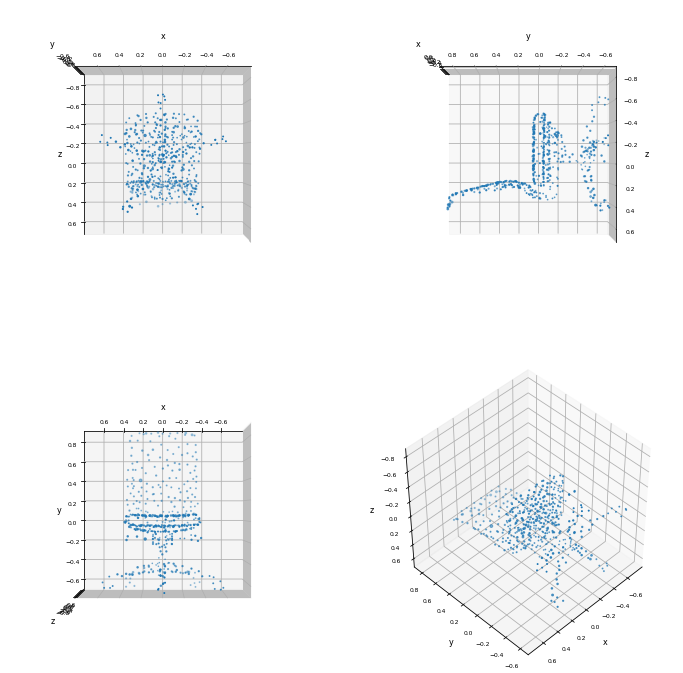

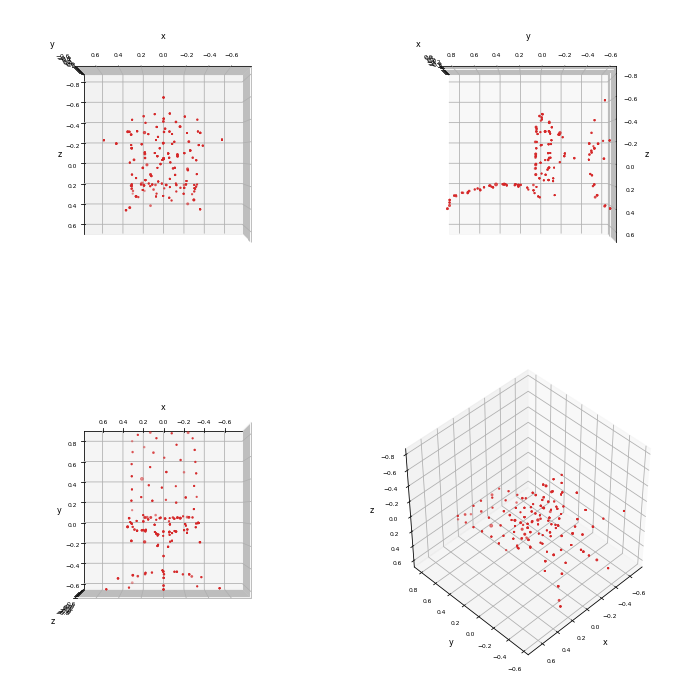

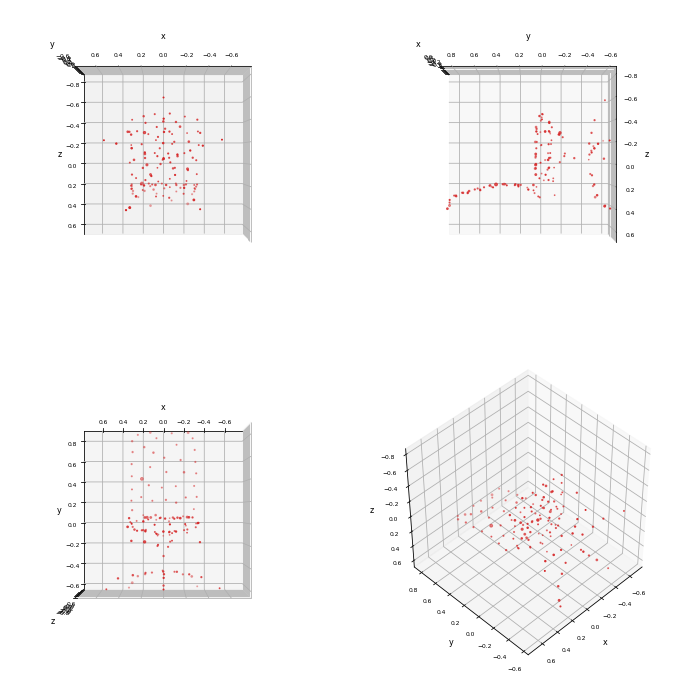

In [281]:
plot_point_cloud_overlay( (aug_data[:,:3], aug_data[:,6], 0), elev=-90, azim=90)  # diag
plot_point_cloud_overlay( (aug_data[:,3:6], aug_data[:,6], 3), elev=-90, azim=90)  # diag
plot_point_cloud_overlay( (sp, sw, 3), elev=-90, azim=90)  # diag

(array([31., 30., 27., 50., 71., 23., 75., 37., 45., 23., 25., 20.,  9.,
         8.,  9.,  5.,  0.,  9.,  4.,  2.,  0.,  2.,  1.,  2.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.35218191, 0.50283229, 0.65348267, 0.80413305, 0.95478343,
        1.10543381, 1.25608419, 1.40673457, 1.55738495, 1.70803533,
        1.85868571, 2.00933609, 2.15998647, 2.31063685, 2.46128723,
        2.61193761, 2.76258799, 2.91323837, 3.06388875, 3.21453913,
        3.36518951, 3.51583989, 3.66649027, 3.81714065, 3.96779103,
        4.11844141, 4.26909179, 4.41974217, 4.57039255, 4.72104293,
        4.87169331, 5.02234369, 5.17299407, 5.32364445, 5.47429483,
        5.62494521, 5.77559559, 5.92624597, 6.07689635, 6.22754673,
        6.37819711, 6.52884749, 6.67949787, 6.83014825, 6.98079863,
        7.13144901, 7.28209939, 7.43274977, 7.58340015, 7.73405053,
        7.88470091]),
 <a list of 50

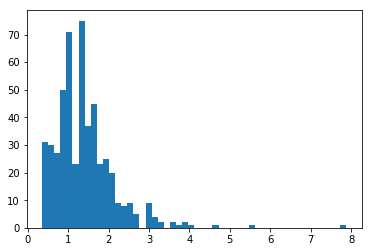

In [280]:
plt.hist(aug_data[:,6], bins=50)

In [303]:
dd = h5py.File('data/modelnet40_ply_hdf5_2048/ply_data_train0.h5', 'r')

In [305]:
list(dd.keys())

['data', 'faceId', 'label', 'normal']

In [308]:
type(dd['data'])

h5py._hl.dataset.Dataset

In [318]:
dd['data']

<HDF5 dataset "data": shape (2048, 2048, 3), type "<f4">

In [314]:
dd['label']

<HDF5 dataset "label": shape (2048, 1), type "|u1">

In [329]:
h5f = h5py.File('data/augmented/train_256_64_1.h5', 'w')

h5f.create_dataset('data', data=np.array(dd['data'], dtype=np.float32))
h5f.create_dataset('label', data=np.array(dd['label'], dtype=np.int8))

h5f.close()

In [330]:
h5f = h5py.File('data/augmented/train_256_64_1.h5', 'r')

data = h5f['data'][:]

In [331]:
type(data)

numpy.ndarray

In [332]:
h5f['data']

<HDF5 dataset "data": shape (2048, 2048, 3), type "<f4">

(array([29.,  8., 14., 30.,  6., 11., 15., 10., 33., 20.,  4.,  3.,  6.,
        21.,  9.,  0.,  3.,  0.,  3.,  0.,  0.,  0., 20.,  8.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.56603962, 0.68175032, 0.79746101, 0.91317171, 1.02888241,
        1.1445931 , 1.2603038 , 1.37601449, 1.49172519, 1.60743589,
        1.72314658, 1.83885728, 1.95456797, 2.07027867, 2.18598937,
        2.30170006, 2.41741076, 2.53312145, 2.64883215, 2.76454285,
        2.88025354, 2.99596424, 3.11167493, 3.22738563, 3.34309633,
        3.45880702, 3.57451772, 3.69022841, 3.80593911, 3.92164981,
        4.0373605 , 4.1530712 , 4.26878189, 4.38449259, 4.50020329,
        4.61591398, 4.73162468, 4.84733537, 4.96304607, 5.07875677,
        5.19446746, 5.31017816, 5.42588885, 5.54159955, 5.65731025,
        5.77302094, 5.88873164, 6.00444233, 6.12015303, 6.23586372,
        6.35157442]),
 <a list of 50

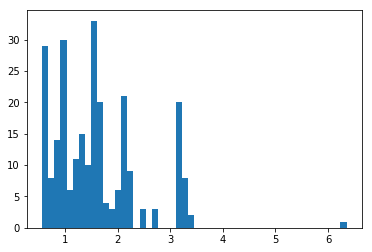

In [360]:
plt.hist(fin['data'][:][0,:,6], bins=50)

## Presentation images

In [367]:
filename = 'data/augmented/train_data_256_64_gmm_inverse_std_2.h5'
filename = 'data/modelnet40_ply_hdf5_2048/ply_data_train2.h5'
fin = h5py.File(filename, 'r')
aug_data = fin['data'][:][15]
rmat = np.array([
    [1, 0, 0], [0, 0, -1], [0, 1, 0]
])

dd = aug_data[:,:3].dot(rmat)

In [382]:
def plot_point_cloud_overlay2(*args):
    xs = args[0][0][:,0]
    ys = args[0][0][:,1]
    zs = args[0][0][:,2]
    
    cmap = plt.get_cmap("tab10")
    
    size = 1
    color = 'b'
    
    titles = ['top', '45 deg', 'front', 'side']

    fig = plt.figure(figsize=(8, 8))

    for i, (elev, azim) in enumerate([(-90, 90), (-135, 135), (-180, 90), (-180, 180)]):
        ax = fig.add_subplot(2,2,i+1, projection='3d')
        for arg in args:
            data, size, color_idx = arg

            ax.scatter(data[:,0], data[:,1], data[:,2], s=size, c=cmap(color_idx))

        ax.set_xlabel('x', fontsize=8)
        ax.set_ylabel('y', fontsize=8)
        ax.set_zlabel('z', fontsize=8)

        ax.set_title(titles[i])
        ax.set_aspect('equal', 'box')

        max_range = np.array([xs.max()-xs.min(), ys.max()-ys.min(), zs.max()-zs.min()]).max() / 2.0

        mid_x = (xs.max()+xs.min()) * 0.5
        mid_y = (ys.max()+ys.min()) * 0.5
        mid_z = (zs.max()+zs.min()) * 0.5
        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)

        ax.tick_params(axis='both', which='major', labelsize=6)
        ax.tick_params(axis='both', which='minor', labelsize=4)
        ax.view_init(elev, azim)
    plt.tight_layout()
    plt.show()

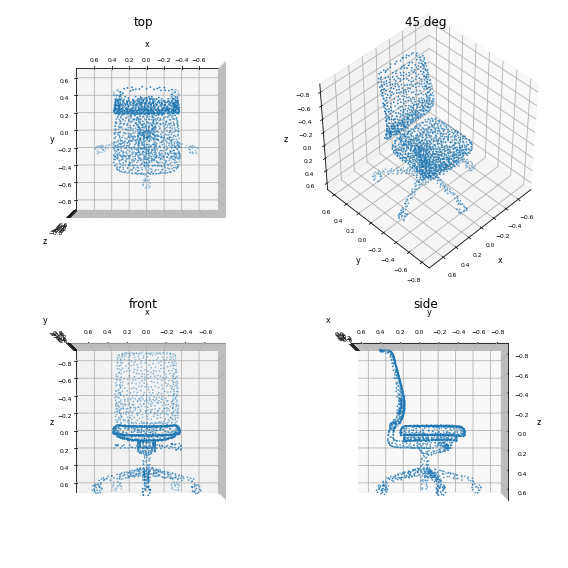

In [383]:
plot_point_cloud_overlay2( (dd, 0.5, 0))  # diag


In [389]:
def plot_point_cloud_single(i, *args):
    xs = args[0][0][:,0]
    ys = args[0][0][:,1]
    zs = args[0][0][:,2]
    
    cmap = plt.get_cmap("tab10")
    
    size = 1
    color = 'b'
    
    titles = ['top', '45 deg', 'front', 'side']

    fig = plt.figure(figsize=(4, 4))

    angles = [(-90, 90), (-135, 135), (-180, 90), (-180, 180)]
    elev, azim = angles[i]
    #ax = fig.add_subplot(2,2,i+1, projection='3d')
    ax = fig.add_subplot(1,1,1, projection='3d')
    for arg in args:
        data, size, color_idx = arg

        ax.scatter(data[:,0], data[:,1], data[:,2], s=size, c=cmap(color_idx))

    ax.set_xlabel('x', fontsize=8)
    ax.set_ylabel('y', fontsize=8)
    ax.set_zlabel('z', fontsize=8)

#     ax.set_title(titles[i])
    ax.set_aspect('equal', 'box')

    max_range = np.array([xs.max()-xs.min(), ys.max()-ys.min(), zs.max()-zs.min()]).max() / 2.0

    mid_x = (xs.max()+xs.min()) * 0.5
    mid_y = (ys.max()+ys.min()) * 0.5
    mid_z = (zs.max()+zs.min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.tick_params(axis='both', which='minor', labelsize=4)
    ax.view_init(elev, azim)
        
    plt.tight_layout()
    plt.show()

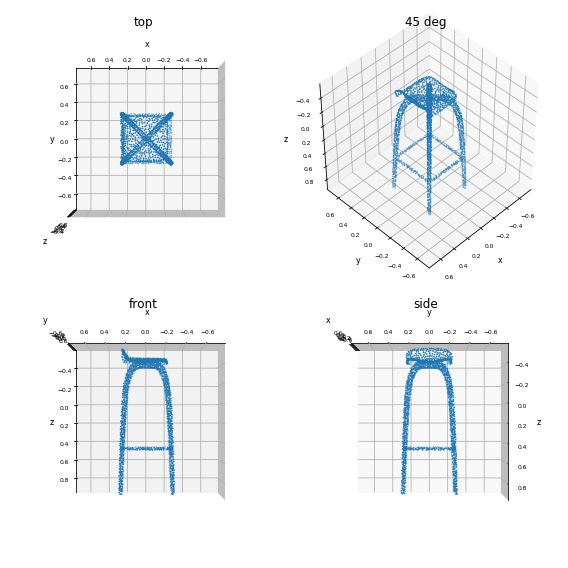

In [407]:
aug_data = fin['data'][:][22]  # lamp
# aug_data = fin['data'][:][26]  # air flighter
aug_data = fin['data'][:][32]  # lamp
dd = aug_data[:,:3].dot(rmat)
plot_point_cloud_overlay2( (dd, 0.5, 0))  # diag


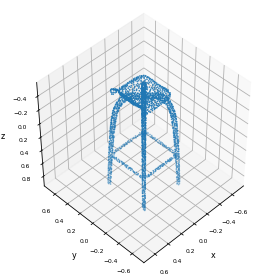

In [408]:
plot_point_cloud_single( 1, (dd, 0.5, 0) )  # diag
